In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import scikitplot as skplt


In [14]:
colnames = ['col1','col2']
label = ['label']
#1000 TRAINING SAMPLES
Xtrain = np.array(pd.read_csv('D:/Desktop/intro to ml 3/train_1000.csv',sep='\t',names = colnames))
ytrain = np.array(pd.read_csv('D:/Desktop/intro to ml 3/label_1000.csv',sep='\t',names = label))
ytrain = np.ravel(ytrain)

#10000 TESTING SAMPLES
Xtest = np.array(pd.read_csv('D:/Desktop/intro to ml 3/test.csv',sep='\t',names = colnames))
ytest = np.array(pd.read_csv('D:/Desktop/intro to ml 3/testlabel.csv',sep='\t',names = label))
ytest = np.ravel(ytest)

In [15]:
#Parameter selection for C-values and gamma
C = [0.01,0.1,1,10,100]
gamma = [0.01,0.1,1,10,100]
param_grid = dict(gamma=gamma, C=C)
gscv = GridSearchCV(SVC(kernel = 'rbf'),param_grid, cv = 10,return_train_score = False)

In [16]:
gscv.fit(Xtrain,ytrain)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [5]:
cv_results = gscv.cv_results_
cv_results['mean_test_score']

array([0.964, 0.916, 0.755, 0.502, 0.502, 0.972, 0.971, 0.895, 0.695,
       0.544, 0.969, 0.966, 0.963, 0.908, 0.765, 0.969, 0.961, 0.963,
       0.915, 0.789, 0.968, 0.95 , 0.962, 0.915, 0.789])

In [6]:

df = pd.DataFrame(gscv.cv_results_)

In [7]:
df_req = df[['params','param_C','param_gamma','mean_test_score']]

In [8]:
df_req

,params,param_C,param_gamma,mean_test_score
0,"{'C': 0.01, 'gamma': 0.01}",0.01,0.01,0.964
1,"{'C': 0.01, 'gamma': 0.1}",0.01,0.1,0.916
2,"{'C': 0.01, 'gamma': 1}",0.01,1,0.755
3,"{'C': 0.01, 'gamma': 10}",0.01,10,0.502
4,"{'C': 0.01, 'gamma': 100}",0.01,100,0.502
5,"{'C': 0.1, 'gamma': 0.01}",0.1,0.01,0.972
6,"{'C': 0.1, 'gamma': 0.1}",0.1,0.1,0.971
7,"{'C': 0.1, 'gamma': 1}",0.1,1,0.895
8,"{'C': 0.1, 'gamma': 10}",0.1,10,0.695
9,"{'C': 0.1, 'gamma': 100}",0.1,100,0.544


In [116]:
# plt.bar(params,df_req['mean_test_score'])

In [10]:
gscv.best_params_

{'C': 0.1, 'gamma': 0.01}

In [11]:
len(C)

5

In [12]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

#     scores_sd = cv_results['std_test_score']
#     scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')


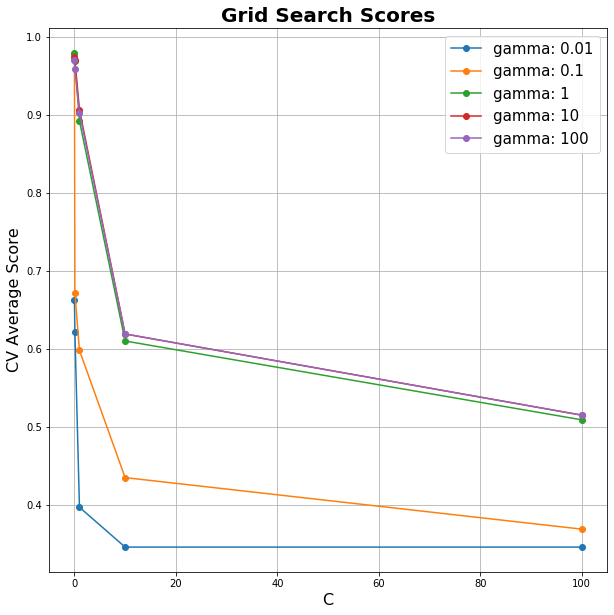

In [145]:
plt.rcParams['figure.figsize'] = (10, 10)
plot_grid_search(cv_results,C,gamma, 'C', 'gamma')

NOW AS WE KNOW THAT WE GOT 'C' = 1 AND 'GAMMA' = 0.01 ASTHE BEST PARAMETERS,NOW WE WILL FIT THE THE SVM ON THE TEST SET WITH THESE PARAMETERS

In [17]:
svc_test = SVC(C=1,kernel='rbf',gamma=0.01)
svc_test.fit(Xtest,ytest)
svc_test.score(Xtest,ytest)*100

97.27

In [18]:
ypred = svc_test.predict(Xtest)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

acc = accuracy_score(ypred,ytest)
cm = confusion_matrix(y_pred=ypred,y_true=ytest)

In [20]:
acc

0.9727

In [21]:
cm

array([[4798,  160],
       [ 113, 4929]], dtype=int64)